# Module H 22.4-6

## 22.4 Numerical Error and Instability

Example: Use the Euler Explicit, Euler Implicit, and Trapezoidal Formulas to solve the pendulum equation over the time interval [0,5] in increments of 0.1 and for an initial solution of S0=[10]. For the model parameters using gl−−√=4. Plot the approximate solution on a single graph

In [1]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

%matplotlib inline 

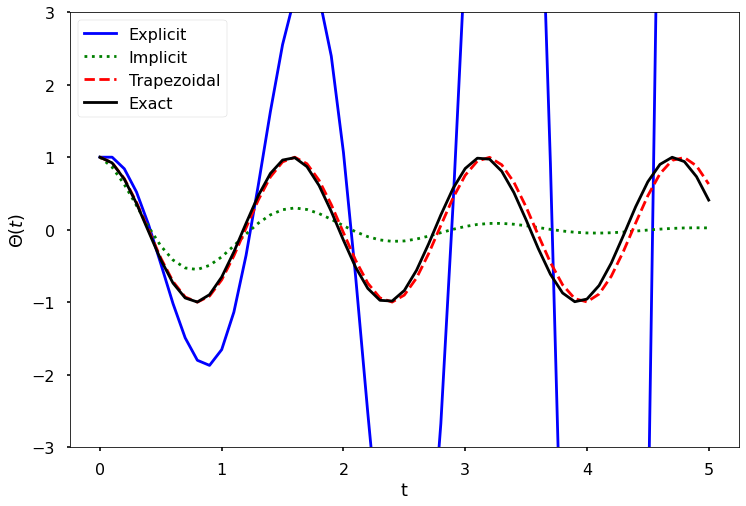

In [2]:
# define step size
h = 0.1
# define numerical grid
t = np.arange(0, 5.1, h)
# oscillation freq. of pendulum
w = 4
s0 = np.array([[1], [0]])

m_e = np.array([[1, h], 
               [-w**2*h, 1]])
m_i = inv(np.array([[1, -h], 
               [w**2*h, 1]]))
m_t = np.dot(inv(np.array([[1, -h/2], 
    [w**2*h/2,1]])), np.array(
      [[1,h/2], [-w**2*h/2, 1]]))

s_e = np.zeros((len(t), 2))
s_i = np.zeros((len(t), 2))
s_t = np.zeros((len(t), 2))

# do integrations
s_e[0, :] = s0.T
s_i[0, :] = s0.T
s_t[0, :] = s0.T

for j in range(0, len(t)-1):
    s_e[j+1, :] = np.dot(m_e,s_e[j, :])
    s_i[j+1, :] = np.dot(m_i,s_i[j, :])
    s_t[j+1, :] = np.dot(m_t,s_t[j, :])
    
plt.figure(figsize = (12, 8))
plt.plot(t,s_e[:,0],'b-')
plt.plot(t,s_i[:,0],'g:')
plt.plot(t,s_t[:,0],'r--')
plt.plot(t, np.cos(w*t), 'k')
plt.ylim([-3, 3])
plt.xlabel('t')
plt.ylabel('$\Theta (t)$')
plt.legend(['Explicit', 'Implicit', \
            'Trapezoidal', 'Exact'])
plt.show()

## 22.5 Predictor-Corrector Methods

Example: The midpoint method has a predictor step:
S(tj+h2)=S(tj)+h2F(tj,S(tj)),

which is the prediction of the solution value halfway between tj
and tj+1

.

It then computes the corrector step:
S(tj+1)=S(tj)+hF(tj+h2,S(tj+h2))

which computes the solution at S(tj+1)
from S(tj) but using the derivative from S(tj+h2).

### Runge Kutta Methods

Runge Kutta (RK) methods are one of the most widely used methods for solving ODEs. Recall that the Euler method uses the first two terms in Taylor series to approximate the numerical integration, which is linear: S(tj+1)=S(tj+h)=S(tj)+h⋅S′(tj)

.

We can greatly improve the accuracy of numerical integration if we keep more terms of the series in
S(tj+1)=S(tj+h)=S(tj)+S′(tj)h+12!S′′(tj)h2+⋯+1n!S(n)(tj)hn(1)

In order to get this more accurate solution, we need to derive the expressions of S′′(tj),S′′′(tj),⋯,S(n)(tj)

. This extra work can be avoided using the RK methods, which is based on truncated Taylor series, but not require computation of these higher derivatives.


### Second order Runge Kutta Method

Example: Let us first derive the second order RK method. Let dS(t)dt=F(t,S(t))

, then we can assume an integration formula the form of
S(t+h)=S(t)+c1F(t,S(t))h+c2F[t+ph,S(t)+qhF(t,S(t))]h(2)

We can attempt to find these parameters c1,c2,p,q

by matching the above equation to the second-order Taylor series, which gives us
S(t+h)=S(t)+S′(t)h+12!S′′(t)h2=S(t)+F(t,S(t))h+12!F′(t,S(t))h2(3)

Noting that $F′(t,s(t))=∂F∂t+∂F∂S∂S∂t=∂F∂t+∂F∂SF

$

Therefore, equation (3)

can be written as:
S(t+h)=S+Fh+12!(∂F∂t+∂F∂SF)h2(4)

In equation (2)

, we can rewrite the last term by applying Taylor series in several variables, which gives us:
F[t+ph,S+qhF)]=F+∂F∂tph+qh∂F∂SF

thus equation (2)

becomes:
S(t+h)=S+(c1+c2)Fh+c1[∂F∂tp+q∂F∂SF]h2(5)

Comparing equation (4)
and (5)

, we can easily obtain:
c1+c2=1, c2p=12, c2q=12(6)

Because (6)

has four unknowns and only three equations, we can assign any value to one of the parameters and get the rest of the parameters. One popular choice is:
c1=12, c2=12, p=1, q=1

We can also define: $$
k1k2==F(tj,S(tj))F(tj+ph,S(tj)+qhk1)
wherewewillhave:$$S(tj+1)=S(tj)+12(k1+k2)h

## 22.6 Python ODE Solver

Example: Consider the ODE
dS(t)dt=cos(t)

for an initial value S0=0
. The exact solution to this problem is S(t)=sin(t). Use solve_ivp to approximate the solution to this initial value problem over the interval [0,π]. Plot the approximate solution versus the exact solution and the relative error over time.


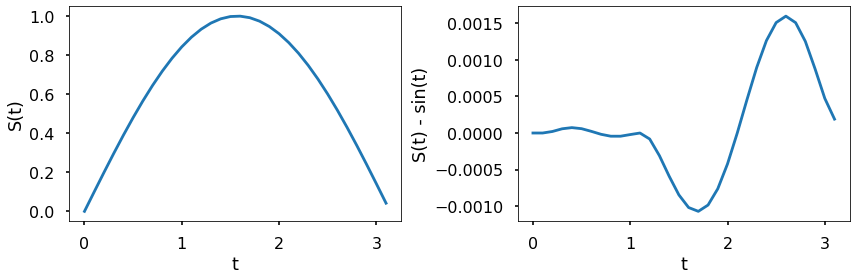

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

plt.style.use('seaborn-poster')

%matplotlib inline

F = lambda t, s: np.cos(t)

t_eval = np.arange(0, np.pi, 0.1)
sol = solve_ivp(F, [0, np.pi], [0], t_eval=t_eval)

plt.figure(figsize = (12, 4))
plt.subplot(121)
plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('S(t)')
plt.subplot(122)
plt.plot(sol.t, sol.y[0] - np.sin(sol.t))
plt.xlabel('t')
plt.ylabel('S(t) - sin(t)')
plt.tight_layout()
plt.show()

Example 2: Using the rtol and atol to make the difference between the approximate and exact solution is less than 1e-7.

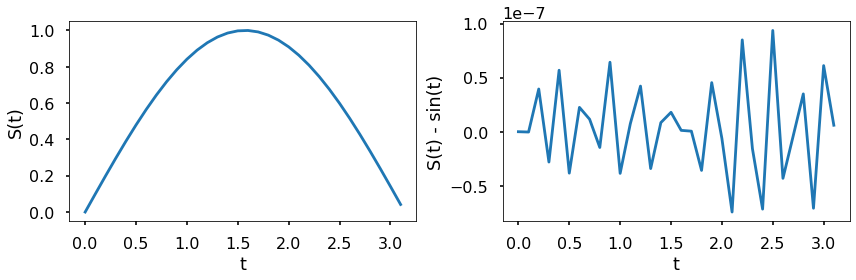

In [4]:
sol = solve_ivp(F, [0, np.pi], [0], t_eval=t_eval, \
                rtol = 1e-8, atol = 1e-8)

plt.figure(figsize = (12, 4))
plt.subplot(121)
plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('S(t)')
plt.subplot(122)
plt.plot(sol.t, sol.y[0] - np.sin(sol.t))
plt.xlabel('t')
plt.ylabel('S(t) - sin(t)')
plt.tight_layout()
plt.show()

Example 3: Let the state of a system be defined by S(t)=[x(t)y(t)]

, and let the evolution of the system be defined by the ODE
dS(t)dt=[0−tt20]S(t).

Use solve_ivp to solve this ODE for the time interval [0,10]
with an initial value of S0=[11]. Plot the solution in (x(t),y(t)).

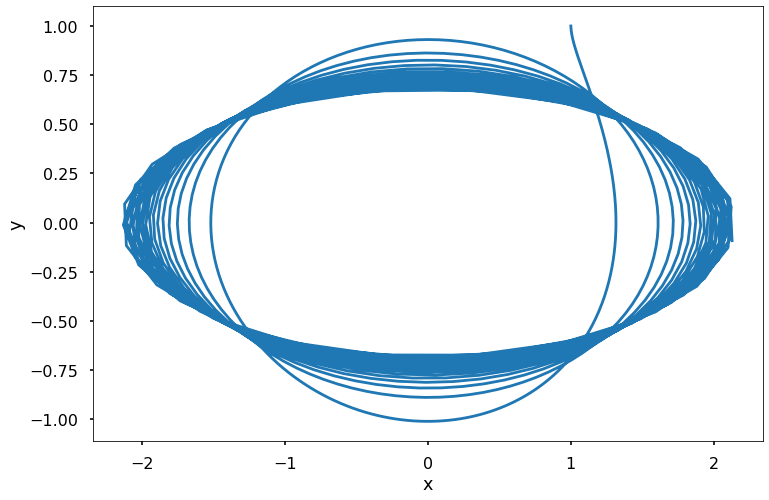

In [5]:
F = lambda t, s: np.dot(np.array([[0, t**2], [-t, 0]]), s)

t_eval = np.arange(0, 10.01, 0.01)
sol = solve_ivp(F, [0, 10], [1, 1], t_eval=t_eval)

plt.figure(figsize = (12, 8))
plt.plot(sol.y.T[:, 0], sol.y.T[:, 1])
plt.xlabel('x')
plt.ylabel('y')
plt.show()